In [29]:
import h5py
from skbeam.core.image import gaussfill, circavgfill
import numpy as np
from pyCXD.detector.eiger import EigerImages
from matplotlib.pyplot import figure, ion, clf, imshow, clim, xlim,ylim, subplot
%matplotlib inline


In [30]:
# load some example data
npdata = np.load("data/imagefill-data.npz")

#this image was averaged over 10 frames
img = npdata['img']
mask = npdata['mask']
x0 = npdata['XCEN']
y0 = npdata['YCEN']

In [31]:
# Navg is 10 because we need to sample from a Poisson distribution assuming
# the count rate was 10 times higher and variance reduced by a factor of sqrt(10)
img_gaussfilled = gaussfill(img,mask,sigma=30,poisson=True,Navg=10)
# calculate the new mask to see what has been filled
newmask_gaussfilled = gaussfill(np.ones(mask.shape), mask, sigma=30) > 1e-6
# we can use a circular average as well

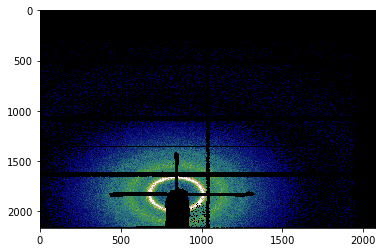

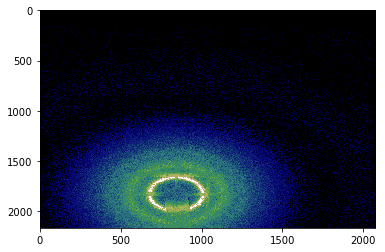

In [32]:
figure(0);clf()
imshow(mask*img);clim(0,10)
figure(1);clf()
imshow(img_gaussfilled);clim(0,10)
#xlim(1000,1500);ylim(1500,1000)


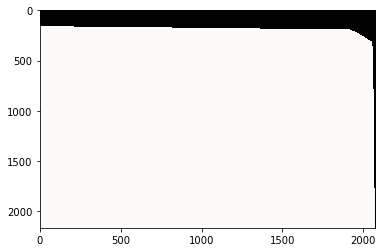

In [33]:
figure(3);clf();
imshow(newmask_gaussfilled)